In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import plotly.express as px
px.defaults.template = "plotly_dark"

In [2]:
def parse_date(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [3]:
data = pd.read_csv("data/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",\
                   encoding='ISO-8859-1',parse_dates=[['year','month','day','hour']], \
                   date_parser=parse_date,keep_date_col=True)

In [4]:
data.drop(columns=["No"],inplace=True)

In [5]:
data

year_month_day_hour  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0     2013-03-01 00:00:00  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1     2013-03-01 01:00:00  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2     2013-03-01 02:00:00  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3     2013-03-01 03:00:00  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4     2013-03-01 04:00:00  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   
...                   ...   ...   ...  ..  ...    ...   ...  ...  ...    ...   
35059 2017-02-28 19:00:00  2017     2  28   19   11.0  11.0  2.0  2.0  200.0   
35060 2017-02-28 20:00:00  2017     2  28   20   13.0  13.0  2.0  2.0  200.0   
35061 2017-02-28 21:00:00  2017     2  28   21    9.0  14.0  2.0  2.0  200.0   
35062 2017-02-28 22:00:00  2017     2  28   22   10.0  12.0  2.0  2.0  200.0   
35063 2017-02-28 23:00:00  2017     2  28   23   13.0  16.0  4.0  9.0  500.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0       82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1       80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2       79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3       79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4       81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...      ...   ...     ...   ...   ...  ...   ...       ...  
35059   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  101.0  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061  102.0   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062   97.0   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063   74.0   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 18 columns]

In [6]:
data["PM2.5"].fillna(method="ffill",inplace=True)

In [7]:
values_count = data['wd'].value_counts()
values_count = values_count.to_frame()
values_count

wd
NNW  4776
NW   3838
N    3777
WNW  2877
ESE  2786
E    2427
NNE  1919
SSE  1853
SE   1823
NE   1721
S    1700
W    1412
ENE  1305
SSW  1126
SW    880
WSW   704

In [8]:
# fig = px.bar(values_count, x=values_count.index, y=values_count["wd"])
# fig.show()

In [9]:
values_count.loc['ENE']

wd    1305
Name: ENE, dtype: int64

In [10]:
grpdta = data.groupby("wd")

In [11]:
grpdta.get_group("WNW")

year_month_day_hour  year month day hour  PM2.5   PM10   SO2   NO2  \
40    2013-03-02 16:00:00  2013     3   2   16   39.0   44.0  42.0  64.0   
148   2013-03-07 04:00:00  2013     3   7    4   61.0   61.0  24.0   NaN   
223   2013-03-10 07:00:00  2013     3  10    7    8.0    8.0  12.0  10.0   
267   2013-03-12 03:00:00  2013     3  12    3  134.0  176.0  54.0  74.0   
299   2013-03-13 11:00:00  2013     3  13   11    3.0    6.0   3.0   NaN   
...                   ...   ...   ...  ..  ...    ...    ...   ...   ...   
35054 2017-02-28 14:00:00  2017     2  28   14   10.0   26.0   4.0   6.0   
35055 2017-02-28 15:00:00  2017     2  28   15   16.0   27.0   6.0   NaN   
35056 2017-02-28 16:00:00  2017     2  28   16   14.0   30.0   NaN   6.0   
35057 2017-02-28 17:00:00  2017     2  28   17   15.0   39.0   4.0   8.0   
35058 2017-02-28 18:00:00  2017     2  28   18    6.0   25.0   2.0   2.0   

           CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
40      900.0  33.0   2.5  1020.6 -17.1   0.0  WNW   0.5  Dingling  
148     900.0  52.0   1.3  1003.5  -5.0   0.0  WNW   1.8  Dingling  
223     300.0  91.0   5.7  1019.8 -19.0   0.0  WNW   3.3  Dingling  
267    1300.0  46.0   6.3  1003.2  -1.8   0.0  WNW   0.7  Dingling  
299     200.0  86.0   7.4  1021.3 -15.4   0.0  WNW   2.1  Dingling  
...       ...   ...   ...     ...   ...   ...  ...   ...       ...  
35054   300.0  92.0  14.9  1008.4 -12.4   0.0  WNW   4.2  Dingling  
35055   400.0  88.0  15.6  1007.6 -12.8   0.0  WNW   3.2  Dingling  
35056     NaN  93.0  15.4  1007.2 -12.9   0.0  WNW   4.4  Dingling  
35057   200.0  94.0  14.7  1007.4 -12.6   0.0  WNW   4.2  Dingling  
35058   200.0  99.0  13.4  1008.1 -13.6   0.0  WNW   3.0  Dingling  

[2877 rows x 18 columns]

In [12]:
grpdta["year"].value_counts()

wd   year
E    2014    819
     2015    614
     2013    537
     2016    423
     2017     34
            ... 
WSW  2015    261
     2014    180
     2016    136
     2013    116
     2017     11
Name: year, Length: 80, dtype: int64

In [13]:
data.drop(columns=["year","month","day","hour"],inplace=True)

In [14]:
fig = px.line(data, x="year_month_day_hour", y="PM2.5", title='Day vs PM2.5 ')
fig.show()

In [15]:
# !pip install statsmodels

In [16]:
# KPSS TEST for stationarity

In [17]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data["PM2.5"])

KPSS Statistic: 0.30801797226298244
p-value: 0.1
num lags: 52
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/omkar/anaconda3/envs/xsfc/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/home/omkar/anaconda3/envs/xsfc/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [18]:
# additive = cyclic + trend + seasonality + resitual  (when data i stationary)
# multiplicative = cyclic * trend * seasonality * resitual   (when data is not)

In [19]:
df =  data.copy()

In [20]:
df.set_index("year_month_day_hour",inplace=True)
df = df['2014':'2015']

In [21]:
import statsmodels.api as sm

In [22]:
res = sm.tsa.seasonal_decompose(df["PM2.5"],model="additive")

In [23]:
obs = res.observed.to_frame()
obs

PM2.5
year_month_day_hour       
2014-01-01 00:00:00   27.0
2014-01-01 01:00:00   25.0
2014-01-01 02:00:00   27.0
2014-01-01 03:00:00   34.0
2014-01-01 04:00:00   32.0
...                    ...
2015-12-31 19:00:00   85.0
2015-12-31 20:00:00   85.0
2015-12-31 21:00:00   80.0
2015-12-31 22:00:00   93.0
2015-12-31 23:00:00   98.0

[17520 rows x 1 columns]

In [24]:
fig = px.line(data, x=resi.index, y=obs["PM2.5"], title='Day vs PM2.5 ')
fig.show()

NameError: name 'resi' is not defined

In [ ]:
trend = res.trend.to_frame()
trend

In [ ]:
fig = px.line(data, x=resi.index, y=trend["trend"], title='Day vs PM2.5 ')
fig.show()

In [ ]:
sea = res.seasonal.to_frame()
sea

In [ ]:
fig = px.line(data, x=resi.index, y=sea["seasonal"], title='Day vs PM2.5 ')
fig.show()

In [ ]:
resi = res.resid.to_frame()
resi

In [ ]:
fig = px.line(data, x=resi.index, y=resi["resid"], title='Day vs PM2.5 ')
fig.show()

In [ ]:
# Detrending methods ( Removing trend factor from the data )  ie. converting to stationary

# if additive then    =>>> observedvalue-trend
# if multiplicative model==>>  observedvalue * trend

In [ ]:
# as our model is additive 
detrended = pd.DataFrame(res.observed - res.trend)
detrended

In [ ]:
fig = px.line(data, x=detrended.index, y=detrended[0], title='Day vs PM2.5 ')
fig.show()

# Resample

In [25]:
df2 = data[["year_month_day_hour","PM2.5"]]

In [26]:
df2.set_index("year_month_day_hour",inplace=True)

In [27]:
df2 = df2['2014':'2016']
df2

PM2.5
year_month_day_hour       
2014-01-01 00:00:00   27.0
2014-01-01 01:00:00   25.0
2014-01-01 02:00:00   27.0
2014-01-01 03:00:00   34.0
2014-01-01 04:00:00   32.0
...                    ...
2016-12-31 19:00:00  251.0
2016-12-31 20:00:00  256.0
2016-12-31 21:00:00  232.0
2016-12-31 22:00:00  208.0
2016-12-31 23:00:00  204.0

[26304 rows x 1 columns]

<AxesSubplot:xlabel='year_month_day_hour'>

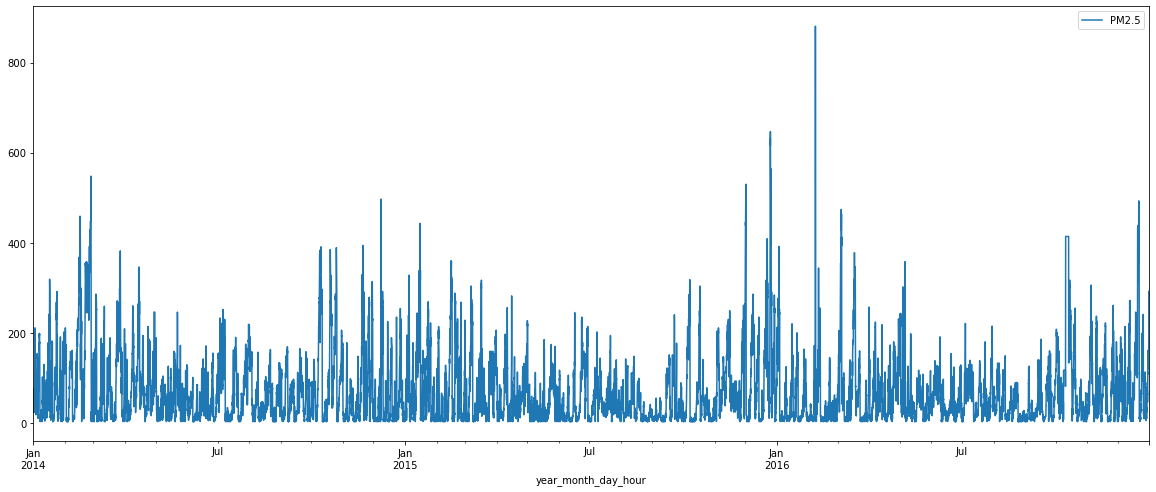

In [28]:
df2.plot(figsize=(20,8))

<AxesSubplot:xlabel='year_month_day_hour'>

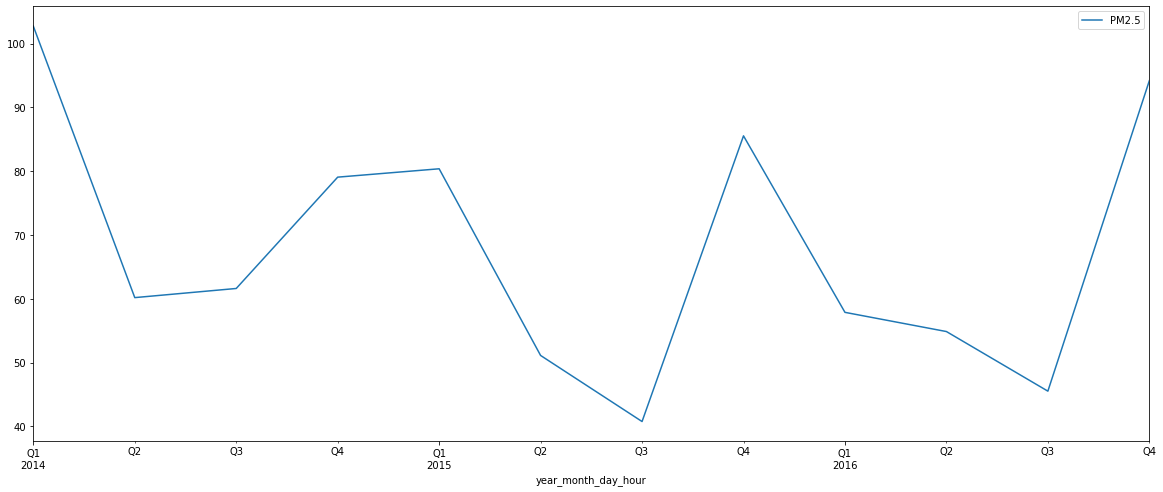

In [29]:
df2.resample("Q").mean().plot(figsize=(20,8))

<AxesSubplot:xlabel='year_month_day_hour'>

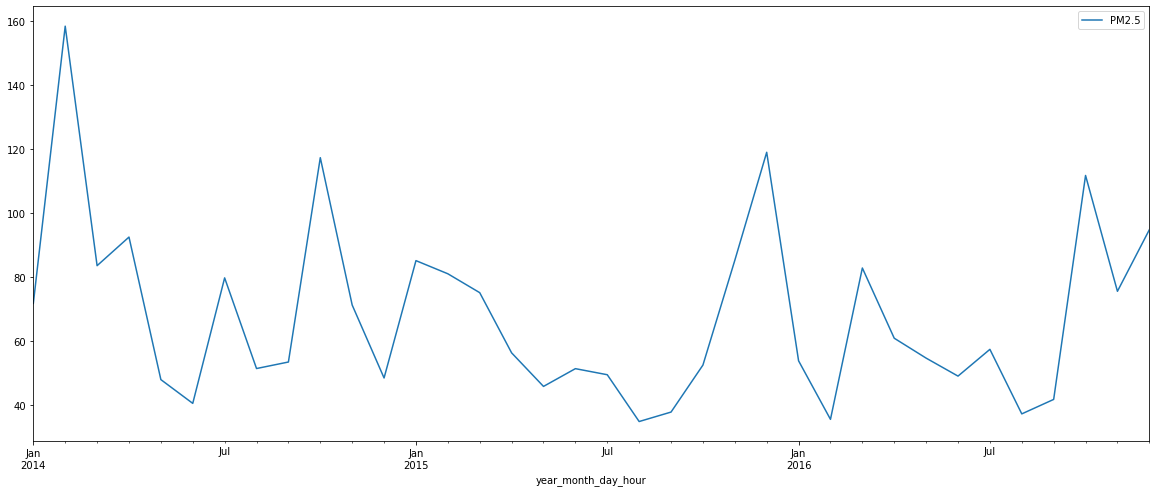

In [30]:
df2.resample("M").mean().plot(figsize=(20,8))

<AxesSubplot:xlabel='year_month_day_hour'>

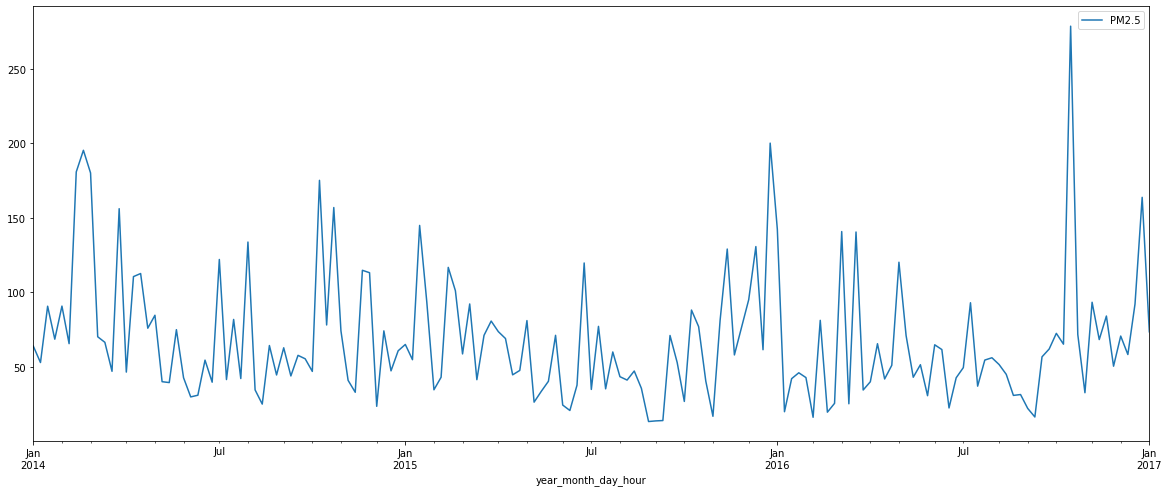

In [31]:
df2.resample("W").mean().plot(figsize=(20,8))

<AxesSubplot:xlabel='year_month_day_hour'>

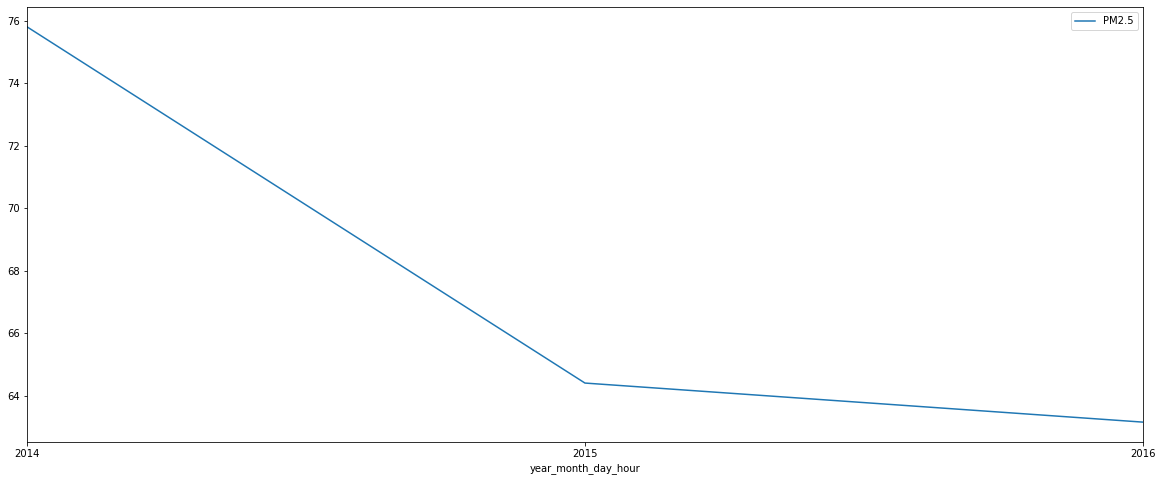

In [32]:
df2.resample("Y").mean().plot(figsize=(20,8))

# Difference

In [33]:
# diff makes data stationary 

<AxesSubplot:xlabel='year_month_day_hour'>

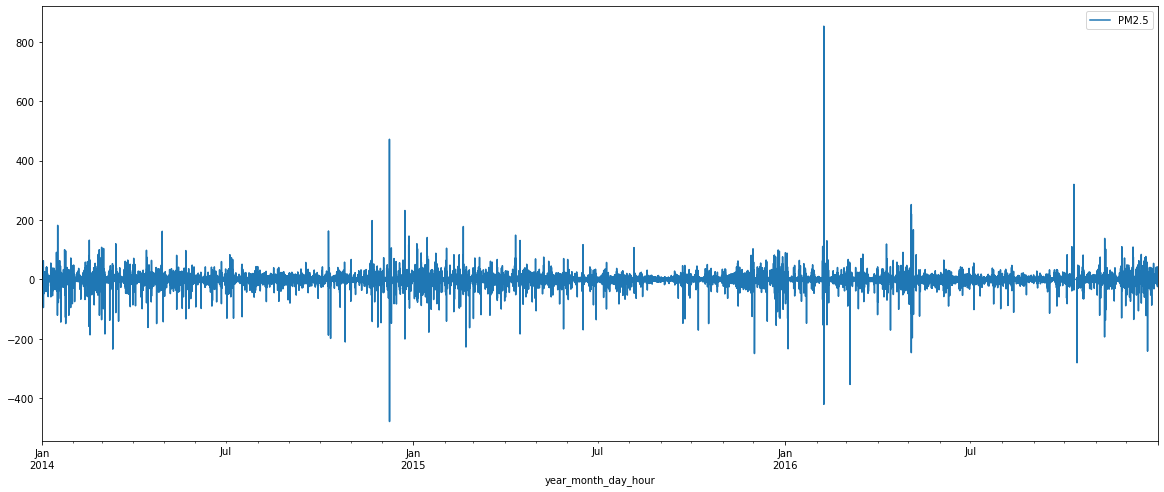

In [34]:
df2.diff().plot(figsize=(20,8))

In [35]:
# curren elemnet - nth element

In [36]:
ddif = df2
ddif["diff"] = df2.diff(2)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

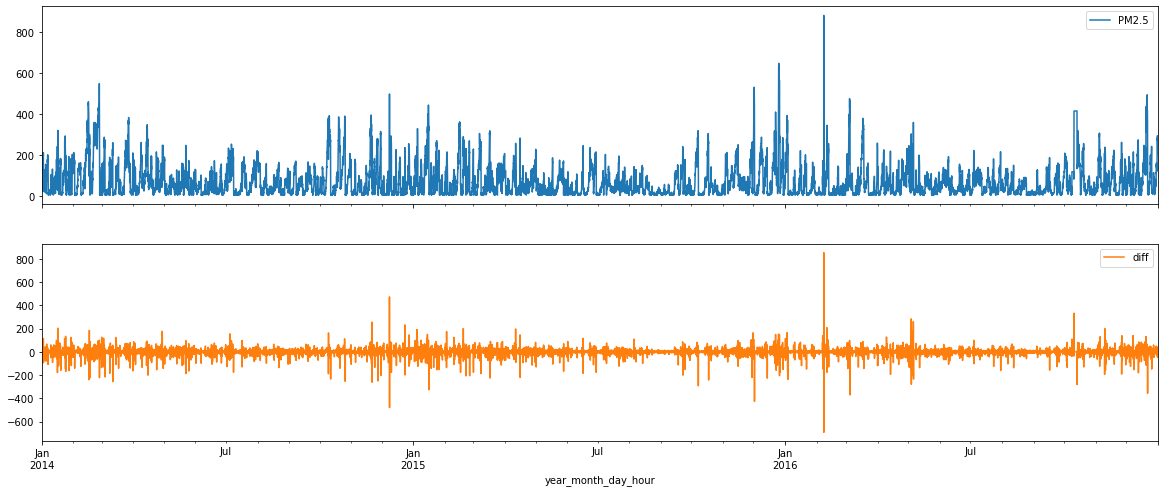

In [37]:
ddif.plot(figsize=(20,8),subplots=True)

# Shifting 

In [38]:
df3 = df2.shift(100)

In [39]:
# df2.drop(columns=["diff"],inplace=True)

<AxesSubplot:xlabel='year_month_day_hour'>

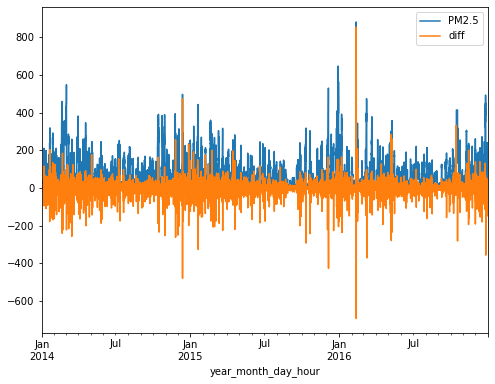

In [40]:
df3.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

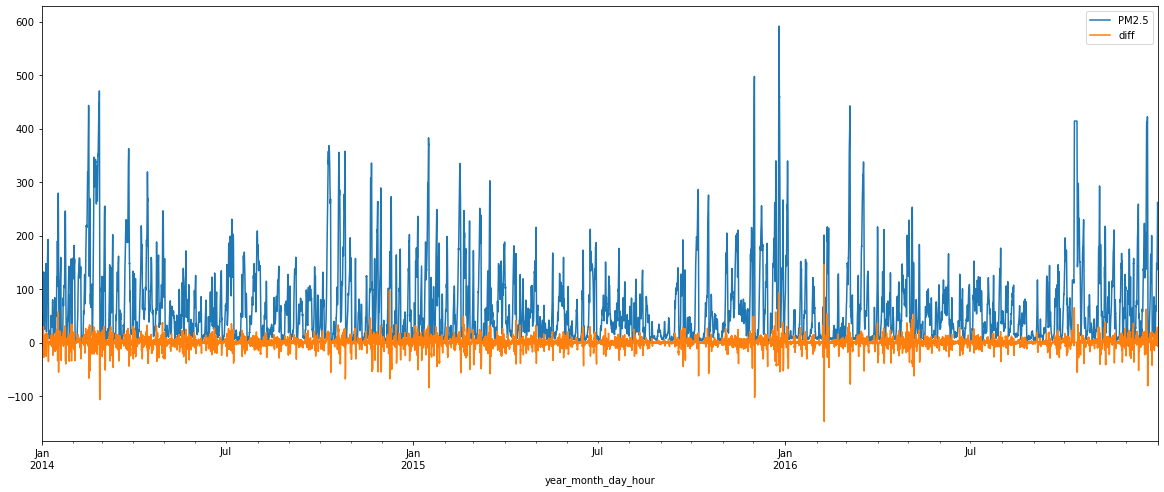

In [41]:
df2.rolling(window=10).mean().plot(figsize=(20,8))

/home/omkar/anaconda3/envs/xsfc/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



<AxesSubplot:xlabel='year_month_day_hour'>

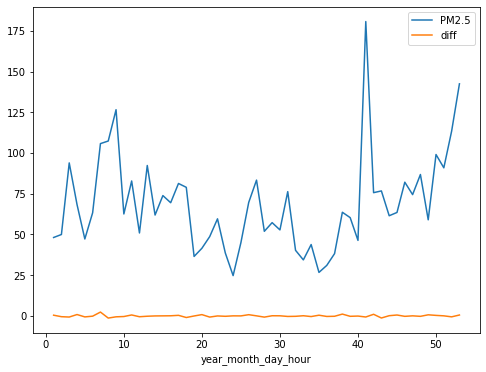

In [42]:
df2.groupby(df2.index.weekofyear).mean().plot()

<AxesSubplot:xlabel='year_month_day_hour'>

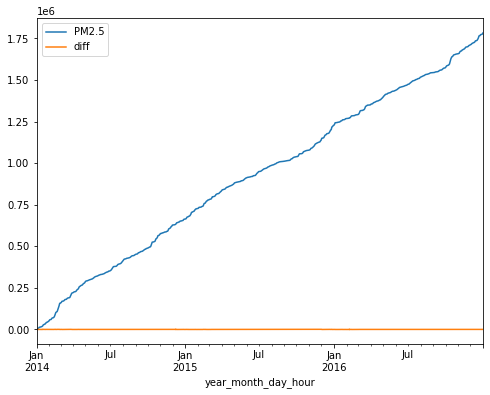

In [43]:
df2.cumsum().plot()

<AxesSubplot:xlabel='year_month_day_hour'>

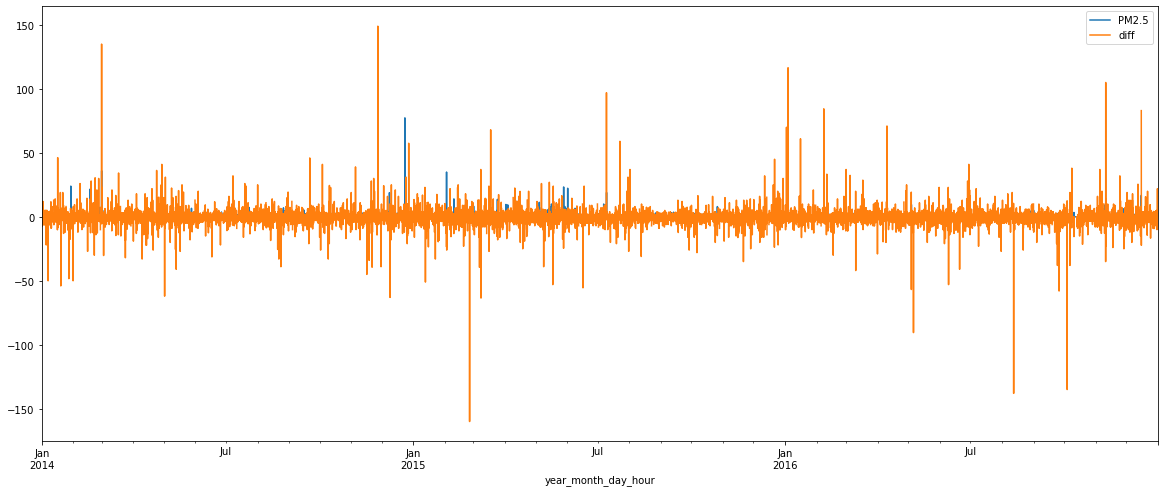

In [44]:
df2.pct_change().plot(figsize=(20,8))

In [45]:
# df2.expanding().sum()

In [46]:
df2["PM2.5"]

year_month_day_hour
2014-01-01 00:00:00     27.0
2014-01-01 01:00:00     25.0
2014-01-01 02:00:00     27.0
2014-01-01 03:00:00     34.0
2014-01-01 04:00:00     32.0
                       ...  
2016-12-31 19:00:00    251.0
2016-12-31 20:00:00    256.0
2016-12-31 21:00:00    232.0
2016-12-31 22:00:00    208.0
2016-12-31 23:00:00    204.0
Name: PM2.5, Length: 26304, dtype: float64

# ADFULLER TEST

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
result = adfuller(df2["PM2.5"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))
    
print(f"The data is {'not' if result[1] > 0.05 else '' } Stationary")

ADF Statistic: -18.501303
p-value: 0.000000
Critical Values:
	1%: -3.430599
	5%: -2.861650
	10%: -2.566829
The data is  Stationary
